# MATH 210 Introduction to Mathematical Computing

**March 10, 2025**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Slope Fields

The slope field of a first order differential equation $y' = f(t,y)$ plots a short line of slope $f(t,y)$ at every point in a grid of points in the $ty$-plane. Copy/paste the code from: [https://patrickwalls.github.io/mathematicalpython/differential-equations/first-order/#slope-fields](https://patrickwalls.github.io/mathematicalpython/differential-equations/first-order/#slope-fields).

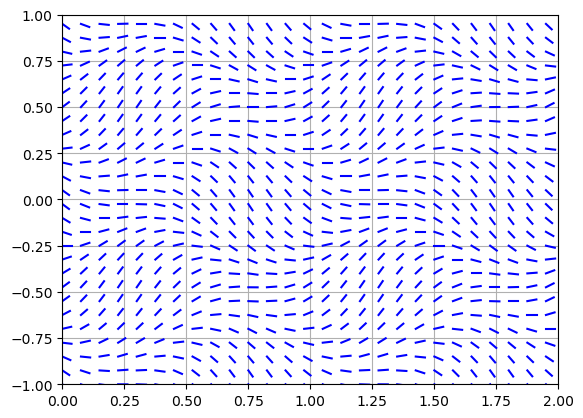

In [2]:
f = lambda t,y: np.sin(2*np.pi*t) - np.cos(2*np.pi*y)
h = 0.075; L = 0.5*h;
t_grid = np.arange(0,2,h)
y_grid = np.arange(-1,1,h)
for t in t_grid:
    for y in y_grid:
        m = f(t,y)
        theta = np.arctan(m)
        plt.plot([t,t + L*np.cos(theta)],
                 [y,y + L*np.sin(theta)],'b')

plt.grid(True), plt.xlim([0,2]), plt.ylim([-1,1])
plt.show()

## Euler's Method

Consider a first order differential equation $y' = f(t,y)$, $y(t_0) = y_0$. Euler's method is the recursive sequence

$$
y_{n+1} = y_n + f(t_n,y_n)(t_{n+1} - t_n)
$$

for some sequence $t_0 < t_1 < t_2 < ...$. Each $y$ value is an approximation $y_n \approx y(t_n)$ of the exact solution $y(t)$ of the differential equation.

Write a function called `odeEuler` which takes `f`, `t`, and `y0`, where

* `f` is a function which represents the right hand side of the equation $y' = f(t,y)$
* `t` is a sequence of $t$ such that the first entry is $t_0$
* `y0` is the initial value $y_0$

The function returns a NumPy arry `y` of $y$ values given by Euler's method.

In [3]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(len(t)-1):
        y[n + 1] = y[n] + f(t[n],y[n])*(t[n + 1] - t[n])
    return y

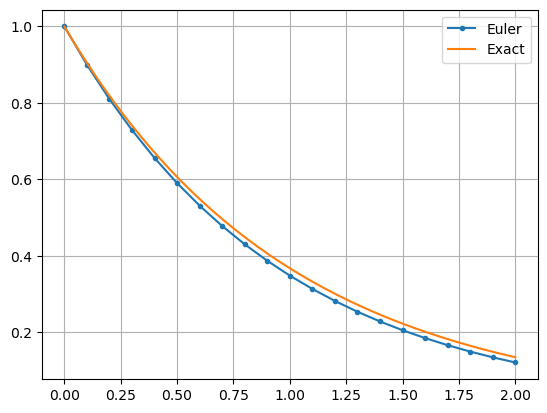

In [4]:
f = lambda t,y: -y # y(t) = exp(-t)
y0 = 1; t0 = 0; tf = 2; N = 20;
t = np.linspace(t0,tf,N+1)

y = odeEuler(f,t,y0)
plt.plot(t,y,'.-')

ts = np.linspace(t0,tf,200)
ys = np.exp(-ts)
plt.plot(ts,ys)

plt.legend(['Euler','Exact']), plt.grid(True)
plt.show()

Let's do the example

$$
y' = \sin(2 \pi t) - \cos(2 \pi y)
$$

for different initial values $y(0)$ and plot with the slope field.

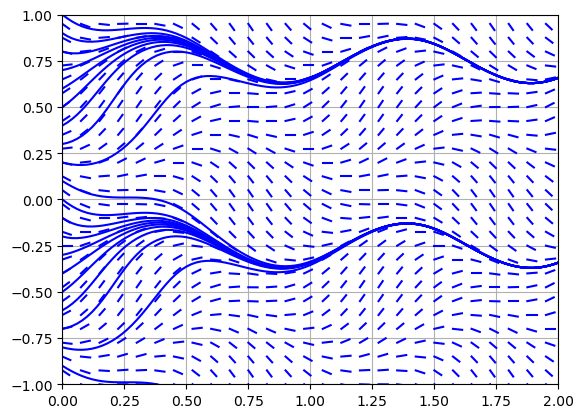

In [5]:
f = lambda t,y: np.sin(2*np.pi*t) - np.cos(2*np.pi*y)

h = 0.075; L = 0.5*h;
t_grid = np.arange(0,2,h)
y_grid = np.arange(-1,1,h)
for t in t_grid:
    for y in y_grid:
        m = f(t,y)
        theta = np.arctan(m)
        plt.plot([t,t + L*np.cos(theta)],
                 [y,y + L*np.sin(theta)],'b')

plt.grid(True), plt.xlim([0,2]), plt.ylim([-1,1])

t0 = 0; tf = 2; N = 100;
t = np.linspace(t0,tf,N+1)

for y0 in np.arange(-1,1.1,0.1):
    y = odeEuler(f,t,y0)
    plt.plot(t,y,'b')

plt.show()